# Lab 4: Linear Classifiers
Machine Learning 2019/2020 <br>
Ruben Wiersma and Gosia Migut

**WHAT** This nonmandatory lab consists of several programming and insight exercises/questions. 

**WHY** The exercises are meant to familiarize yourself with the basic concepts of linear classifiers and to get familiar with a benchmark machine learning problem: MNIST.

**HOW** Follow the exercises in this notebook either on your own or with a friend. There is quite a bit of theory and explanation in these notebooks. If you want to skip right to questions and exercises, find the $\rightarrow$ symbol. Use [Mattermost][1] to discuss questions with your peers. For additional questions and feedback please consult the TA's during the lab session. 

[1]: https://mattermost.ewi.tudelft.nl/ml/channels/town-square
$\newcommand{\q}[1]{\rightarrow \textbf{Question #1}}$
$\newcommand{\ex}[1]{\rightarrow \textbf{Exercise #1}}$
$$
\newcommand{\ls}[1]{{}^{(#1)}}
\renewcommand{\v}[1]{\boldsymbol{#1}}
\renewcommand{\T}{{}^{\top}}
\newcommand{\matvec}[1]{\begin{pmatrix}#1\end{pmatrix}}
$$

## Classifying hand written digits with logistic regression

In this assignment, you will try your hand at a common Machine Learning problem: classifying hand-written digits. Consider a postal office, where each mail item needs to be sorted according to its zip code. Of course, this zip code was handwritten. The code that you will write in the coming exercises will be able to bridge the gap between some scribbles on an envelope and actual digits a computer can understand.

We already have a large set of digits: the MNIST dataset. Originally created by the National Institute of Standards and Technology (NIST) as the NIST dataset with digits written by postal office workers, it was modified by adding digits written by high school students to become the Modified NIST dataset (MNIST). MNIST consists of 60.000 training samples and 10.000 testing samples, where each sample is a $28\times28$ grayscale image of a digit ($0 - 9$).

### Dependencies

$\rightarrow$ Make you sure that you have installed `scipy` and `scikit-learn` in your conda environment. If you're unsure that you have, run `conda list` in your terminal to check which packages are installed and use `conda install [package name]` to install new packages.

In [7]:
# This command imports numpy and matplotlib and makes sure all plots are displayed inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Classifying MNIST with logistic regression

Scikit-learn, the machine learning package for Python, has the MNIST dataset built in. The dataset that we use contains images of hand-written digits that are only 8 by 8 pixels (instead of the original $28 \times 28$ pixels), which means the algorithm (logistic regression) should run on every computer.

The code in the following cell shows how to work with the digits dataset and how to visualize it.

The numbers shown are: [[0 1 2 3 4]
 [5 6 7 8 9]]


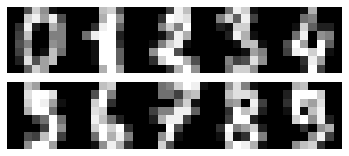

In [8]:
# Import the load function for the dataset
from sklearn.datasets import load_digits

# Load the digits with 10 classes (0 - 9)
digits = load_digits(n_class=10)

# Plot the numbers in two rows
firstrow = np.hstack(digits.images[:5,:,:])
white_line = np.ones((1, 40)) * 16
secondrow = np.hstack(digits.images[5:10,:,:])

# Show both rows at the same time
plt.gray()
plt.axis('off')
plt.imshow(np.vstack((firstrow, white_line, secondrow)))

print("The numbers shown are:", np.vstack((digits.target[:5], digits.target[5:10])))

### Logistic regression for classification

Let's reformulate the goal for this exercise into mathematical notation:

- We have $m$ training images $x^{(1)}, \ldots, x^{(m)}$. Each $x^{(i)}$ is a $64 \times 1$ vector, represting the grayscale values for each pixel in the $8 \times 8$ image.
- Each image is associated with a discrete label $y^{(i)} \in \{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$
- We want to derive a hypothesis function that can predict the label of any new image $x$. We will write this hypothesis function as $h_{\theta}(x) \approx y$

In this notebook, we will find out the following:
1. How we define $h_{\theta}(x)$
2. How we define a 'good' classifier with log likelihood
3. How to find a $\v\theta$ that maximizes the log likelihood

And finally, we will apply these lessons to classify MNIST.

### 1. Binary classification using probilities

Let's start simple, by only performing binary classification: Given a digit, we want to find out if it is a $1$ or a $0$. In other words: if it is a 1 or not.

We will setup the hypothesis function to predict the probability that the given digit is a 1. If the probability is high, we can conclude the digit is a 1, if it is low, the digit is likely to be a 0.

Thus, we set:

$$
P(y = 1 | x; \theta) = h_{\theta}(x)\\
P(y = 0 | x; \theta) = 1 - h_{\theta}(x)
$$

Now, it's time to formulate the hypothesis function. The hypothesis function should take as input the image $x$, which is a vector of length $64$ and a vector $\theta$, which we will learn. We define the following hypothesis function:

(eq. 1.1)$$
h_{\v\theta}(x) = g(\v\theta\T x) = \frac{1}{1 + e^{-\v\theta\T x}}
$$

Let's take a look at why we use this formulation. First, the dot product $\v\theta\T x$:

$\q{1.1}$ Write out the dot-product between $\theta$ and $x$ if both are a vector of size $4$. Can you see that the dot product is a simple way of writing a linear combination of $x$'s elements?

Next, the function around the dot product, $g(z)$, which we call the sigmoid function:

(eq. 1.2)$$
g(z) = \frac{1}{1 + e^{-z}}
$$

Let's plot it to see what it does:

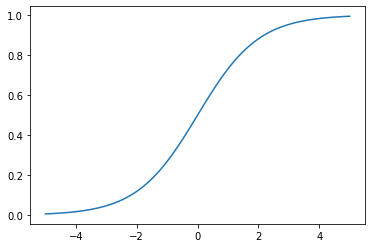

In [9]:
z = np.linspace(-5, 5, 100)
sigmoid = 1 / (1 + np.exp(-z))
plot(z, sigmoid)

Notice that $g(z)$ tends towards $1$ as $z \rightarrow \infty$, and $g(z)$ tends towards $0$ as $z \rightarrow - \infty$. Also, $g(z)$, and therefore $h(x)$, is always bounded between $0$ and $1$.

$\q{1.2}$ Why are these properties convenient to model a probability?

A useful property of the derivative of the sigmoid function that we will use later on is the following:

$$
      g'(z) = g(z)(1 - g(z))
$$

$\ex{1.1}$ Implement the hypothesis function from eq. 1.1.

In [11]:
def hypothesis(x,theta):
    """
    Computes the hypothesis function.
    :param x: numpy array of size (d, ) where d are the number of input features
    :param theta: numpy array of size (d, n) of theta where d is the number of input features 
        and n is the number of classifiers.
    :return: predicted probability.
    """
    sigmoid = 1 / (1 + np.exp(np.matmul(np.multiply(-1,theta),x)))               
    # STUDENT
    return sigmoid

# The images are stored in digits.images as 8 x 8 arrays.
# Therefore, we flatten the image to a 64 x 1 array
x = digits.images[0].flatten()

# To test our hypothesis function, we set three different theta vectors
# All 1
theta_ones = np.ones(64)
# All 0
theta_zeros = np.zeros(64)
# All -1
theta_min_ones = -1 * np.ones(64)

# And apply the prediction
hypothesis_ones = hypothesis(x, theta_ones)
hypothesis_zeros = hypothesis(x, theta_zeros)
hypothesis_min_ones = hypothesis(x, theta_min_ones)

# Output for each theta vector
print("Prediction ones: {}".format(hypothesis_ones))
print("Prediction zeros: {}".format(hypothesis_zeros))
print("Prediction minus ones: {}".format(hypothesis_min_ones))

Prediction ones: 1.0
Prediction zeros: 0.5
Prediction minus ones: 2.0769322043867094e-128


$\q{1.3}$ We have supplied three different variants for $\theta$ and computed the prediction for each. Can you explain the output?

### 2. Probabilities
Remember that we wanted to use our hypothesis function to predict the likelihood of a label given the input image:

$$
P(y = 1 | x; \theta) = h_{\theta}(x)\\
P(y = 0 | x; \theta) = 1 - h_{\theta}(x)
$$

We can rewrite these two equations into one:

(eq. 2.1) $$
p(y | x; \theta) = (h_{\theta}(x))^y(1 - h_{\theta}(x))^{1-y}
$$

### Likelihood

Our next question is the following: how do we set $\theta$ to a good value. Before we can answer these questions, though, we need to define what is 'good'.

We will set out the following goal for our classifier: **given an image $x^{(i)}$ and its label $y^{(i)}$, we want the predicted probability for the correct label ($y^{(i)}$) to approach $1$**:

(eq. 2.2)$$
p(y^{(i)} | x^{(i)}; \theta) \rightarrow 1
$$

$\q{2.1}$ Write eq. 2.2 using the hypothesis function (eq. 2.1) instead of the probability notation.

The predicted probability for the correct labels is called the _likelihood_ of our classifier. To make it easier to train our classifier, we will try to maximize the likelood instead of desiring the probability to approach $1$.

We can compute the likelihood of the entire training set, by computing the product of the likelihood of all samples in the training set:

(eq. 2.3)$$
L(\theta) = p(\mathbf{y} | X; \theta) = \prod_{i = 1}^m p(y^{(i)} | x^{(i)}; \theta)
$$

$\q{2.2}$ Substitute [eq. 2.1](#Probabilities) into the likelihood for the entire training set.

To recap our goal for an entire training set: **given a training set $X$ with labels $\mathbf{y}$, we want to maximize the likelihood.**

A final step before we can start implementing. It is easier to maximize the log of the likelihood. We call this the _log likelihood_. This results in the following formulation for the _log likelihood_ of our parameters:

(eq. 2.4)$$
\ell(\theta) = \log L(\theta) = \sum_{i = 1}^m y^{(i)} \log (h_{\theta}(x^{(i)}) + (1 - y^{(i)})\log(1 - h_{\theta}(x^{(i)}))
$$

$\q{2.3}$ Check to see if this is indeed the $\log$ of your answer to question 2.2.

$\ex{2.1}$ Now implement eq 2.4. You are given a numpy array of predicted probabilities `x_predict` and a numpy array of correct labels `y`.

In [ ]:
def likelihood(x_predict,y):
    """
    Computes the log likelihood of your classifier.
    :param x_predict: numpy array of predicted probabilities.
    :param y: numpy array of actual y values.
    :return: The log likelihood as a scaler.
    """
    
    # STUDENT

# There will be errors from numpy regarding division by zero and invalid value in multiply. 
# If you wish to ignore these errors you can uncomment the following line:
#np.seterr(divide='ignore', invalid='ignore')

# These predictions should do well
x2_predict = np.array([0.2, 0.1, 0.9, 0.8])
y2 = np.array([0, 0, 1, 1])
print(likelihood(x2_predict, y2)) 

# These predictions are wrong
x2_predict = np.array([0.9, 0.8, 0.99, 0.3, 0.1])
y2 = np.array([0, 0, 1, 1, 1])
print(likelihood(x2_predict, y2))

### 3. Gradient Ascent

In the lectures you were introduced to gradient descent, a method to find the (local) minimum of a function.

$\q{3.1}$ Explain the intuition behind gradient descent in your own words or illustrate the concept.

Remember that we want to _maximize the log likelihood_. Maximizing instead of minimizing a function. Therefore, we will reuse the gradient descent theory and simply apply it in the reverse direction. This is what that looks like:
1. Set $\theta$ to a vector of random values.
2. For each training sample:
    * Compute the gradient of the _log likelihood_ function for that $\theta$ and training sample.
    * Adjust $\theta$ in the direction of the gradient.
3. Repeat from step 2 until convergence.

$\q{3.2}$ Which of these steps has been reversed with regards to gradient descent?

For step 2, we will need the gradient of the _log likelihood_ function. We will provide this for you:

(eq. 3.1)$$
\frac{\partial}{\partial \theta_j} \ell(\theta) = (y - h_{\theta}(x))x_j
$$

$\q{3.3 (optional)}$ Validate this derivative by computing the derivation of $\ell(\theta)$ yourself. 
__Hint__ remember the useful property of the sigmoid function? Also remember the chain rule.

In step 2, we adjust $\theta$ in the direction of the gradient multiplied by the learning rate. We are going to write this adjustment for each separate paremeter, $\theta_j$:

(eq. 3.2)$$
\theta_j := \theta_j + \alpha \frac{\partial}{\partial \theta_j} \ell(\theta)\\
\theta_j := \theta_j + \alpha(y^{(i)} - h_{\theta}(x^{(i)}))x_j^{(i)}
$$
Where $\alpha$ is the learning rate and $x_j^{(i)}$ is the $j$-th pixel in image $i$.

$\q{3.4}$ Why do we need the learning rate?

$\ex{3.1}$ Implement the code to apply the gradient ascent step (eq. 3.2). Try doing this without writing explicit `for` loops. Use Numpy to make computations for the entire array of values at once.

In [ ]:
def apply_gradient(theta, x, y, alpha):
    """
    Applies the gradient step to theta and returns an adjusted theta.
    :param theta: current theta array of size (d,)
    :param x: image array of size (d,)
    :param y: integer label of image
    :param alpha: learning rate float
    :return: the updated theta array of size (d,)
    """
    # STUDENT
    return updated_theta

### 4. Logistic Regression on MNIST

Great! We have a way to predict the probability for two classes. Now we will implement this for MNIST.

First, we want to be able to make predictions for a test set. Before you write this, think about how you can transform a continuous probability into a discrete label.

$\ex{4.1}$ Write a predict function that gives the predictions for an entire test set.

In [ ]:
def predict_binary(x_test, theta):
    """
    Predicts a label for each image in x_test using theta.
    :param x_test: an array of size (m, 64) of all test images.
    :param theta: a (64,) array of trained theta.
    :return: an array of size (m,) of labels for each test_image.
    """
    predictions = np.zeros(x_test.shape[0])
    for i, x in enumerate(x_test):
        # STUDENT
        
    return predictions

Given a set of predictions, we would like to compute the accuracy of these predictions.

$\ex{4.2}$ Complete the `accuracy` function, which returns the percentage of predictions that were correct.

In [ ]:
def compute_accuracy(predictions, y_true):
    """
    Computes the accuracy of the predictions based on the true labels.
    :param predictions: an array of size (m,) of the computed predictions for each image.
    :param y_true: an array of size (m,) of the true labels of each image.
    :return: the accuracy of the predictions.
    """
    # STUDENT
    return accuracy

$\ex{4.3}$ Complete the code below to run your classifier and predict the labels for the test set.

In [ ]:
# Load only ones and twos
digits4 = load_digits(n_class=2)

# Split dataset into train and test set
x4_train = np.reshape(digits4.images[:240],(240,64))
x4_test = np.reshape(digits4.images[240:],(120,64))
y4_train = digits4.target[:240]
y4_test = digits4.target[240:]

# Set learning rate (try experimenting with this)
alpha4 = 0.01

# Set theta to intial value
theta4 = np.zeros((64,))

# We go through the entire training set a number of times
# Each of these iterations is called an epoch
n_epochs4 = 5
for epoch in range(n_epochs4):
    for i, x in enumerate(x4_train):
        # Update theta
        # STUDENT
        
# Next, we want to test our theta on the test set
# Make predictions
# STUDENT

# And print the accuracy
accuracy4 = compute_accuracy(predictions4, y4_test)
print('Accuracy on binary classification: {}'.format(accuracy4))

Try setting the learning rate to a higher value and a lower value (e.g.: 0.05, 0.01 respectively).

$\q{4.1}$ Which learning rate performs better? Why?

$\ex{4.4}$ Complete the following code to see how the classifier develops over time. This plot resembles a learning curve, but does not completely suffice as a learning curve as it is not averaged over multiple splits or epochs.

$\q{4.2}$ Experiment with the learning rate. What is the effect on the 'learning curve'?

In [ ]:
# Set learning rate (try experimenting with this)
alpha4 = 0.001

# Set theta to intial value
theta4 = np.zeros((64,))

# We go through the entire training set a number of times
# Each of these iterations is called an epoch
n_epochs4 = 1
accuracies4 = []
for _ in range(n_epochs4):
    for i, x in enumerate(x4_train):
        # Update theta, get predictions and compute accuracy
        # STUDENT
        
plt.plot(np.arange(len(accuracies4)), accuracies4)
plt.show()

### 5. Multi-class Logistic Classifier

Next, we will extend your code for binary classification to ten classes.

$\q{5.1}$ Before we go through the steps to make this work, think about how you could do this for yourself.

Remember that we set the hypothesis function to give the probability that an image was a $1$.

$$
P(y = 1 | x; \theta) = h_{\theta}(x)\\
P(y = 0 | x; \theta) = 1 - h_{\theta}(x)
$$

Because the only other class was a $0$, we could conclude that an image was $0$ if the probability was low.

Now, we create ten hypothesis functions (ten different theta's): one for each class. Each hypothesis tells us the probability that a given image belongs to the corresponding class. If the probability is low, it must belong to some other class.

When we apply these ten hypothesis functions to an image, we get ten different probabilities.

$\q{5.2}$ Given ten probabilities, one for each class, how would you decide which class an image belongs to?

$\ex{5.1}$ Finish the predict function for ten classes.

__Hint__ `np.argmax` can be used to return the index of the maximum value in an array.

In [ ]:
def predict_multiclass(x_test, theta):
    """
    Predicts a label for each image in x_test using theta.
    :param x_test: an array of size (m, 64) of all test images.
    :param theta: a (64,10) array of trained theta.
    :return: an array of size (m,) of labels for each test_image.
    """
    predictions = np.zeros(x_test.shape[0])
    for i, x in enumerate(x_test):
        # STUDENT
        
    return predictions

$\ex{5.2}$ Complete the code below to perform multi-class classification.

__Hint__ You might have to rewrite your `hypothesis` or `apply_gradient` functions to work well with the extra dimension for theta $(64, 10)$ instead of $(64,)$. The extra dimension can result in a mis-match between the dimensions of, for example `x` and the hypothesis output. You can add a dimension to your array by using: `x.reshape(-1, 1)`.

In [ ]:
def apply_gradient2(theta, x, y, alpha):
    """
    Applies the gradient step to theta and returns an adjusted theta.
    :param theta: current theta matrix of size (d, n) where n is the number of classifiers.
    :param x: image array of size (d,)
    :param y: a hot one encoded label of image (n,) where n is the number of classifiers.
    :param alpha: learning rate float
    :return: the updated theta matrix of size (d, n)
    """
    # STUDENT
    return updated_theta

In [ ]:
from sklearn.model_selection import train_test_split #to split in train and test set
# Load only ones and twos, because 
#  linear classifiers can only differentiate between two classes.
# (i.e. "ones" and "Not-ones")
digits5 = load_digits(n_class=10)

# Split dataset into train and test set
x5_train, x5_test, y5_train, y5_test = train_test_split(digits5.data, digits5.target, test_size=0.4) 

# Set learning rate (try experimenting with this)
alpha5 = 0.01

# Set theta to intial value
theta5 = np.zeros((64, 10))

# We go through the entire training set a number of times
# Each of these iterations is called an epoch
n_epochs5 = 5
for epoch in range(n_epochs5):
    for i, x in enumerate(x5_train):
        # We transform the label to a one-hot encoding vector
        # This is a vector of zeros with a one on the location of the label
        # E.g. if the label is 3, the one-hot encoding is [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
        y5 = np.zeros(10)
        y5[y5_train[i]] = 1
        # Update theta
        # STUDENT
        
# Next, we want to test our theta on the test set
# Make predictions
# STUDENT

# And print the accuracy
accuracy5 = compute_accuracy(predictions5, y5_test)
print('Accuracy on multi-class classification: {}'.format(accuracy5))

### 6. Analysis

In the previous week, you have implemented K-Nearest Neighbours, an example of a non-parametric classifier. This week, you implemented a linear classifier. Let's see how they compare on the bias-variance trade-off.

- Bias describes the error of the classifier.
- Variance describes how much a classifier changes when the training set changes.

Often, a classifier with high bias has a low variance and vice-versa. This is what we call the bias-variance trade-off.

$\q{6.1}$ Which classifier do you expect to have higher bias: K-NN or the Logistic Classifier?

$\q{6.2}$ Which classifier do you expect to have higher variance: K-NN or the Logistic Classifier?

To give you an intuition about these concepts, without going into too much detail, we will investigate these two with Sklearn's implementation.

First, bias:

$\ex{6.1}$ Run the code below a number of times, or write a loop to automatically compute the average accuracy over a couple of different train/test splits.

In [ ]:
# Import the load function for the dataset, the train/test split function and the classifiers
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Load the digits with 10 classes (0 - 9)
digits = load_digits(n_class=10)
x6 = digits.images
y6 = digits.target

# Split the dataset randomly between train and test
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=0.3, random_state=42)
# Flatten images
x6_train, x6_test = x6_train.reshape(x6_train.shape[0], -1), x6_test.reshape(x6_test.shape[0], -1)

# Train the classifiers (using the fit function)
knn_clf = KNeighborsClassifier(n_neighbors=3).fit(x6_train, y6_train)
lr_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(x6_train, y6_train)

# Return predictions
knn_predictions = knn_clf.predict(x6_test)
lr_predictions = lr_clf.predict(x6_test)

# Compute and print accuracy
knn_accuracy = compute_accuracy(knn_predictions, y6_test)
lr_accuracy = compute_accuracy(lr_predictions, y6_test)
print('Accuracy of k-nn: {}, accuracy for logistic regression: {}'.format(knn_accuracy, lr_accuracy))

$\q{6.3}$ Which classifier has higher bias?

Next, variance. To investigate this, we will plot the decision boundary in a 2D plot of a dummy dataset, since a decision boundary is hard to plot for 64 features. This shows us what the classifier 'looks like'.

$\q{6.4}$ Run the code below. Which classifier has higher variance?

$\q{6.5}$ When would you prefer a classifier with high bias and low variance? When would you prefer a classifier with low bias and high variance?

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import time

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Logistic Regression"]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(multi_class='multinomial', solver='lbfgs')]

x7, y7 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
x7 += 2 * rng.uniform(size=x7.shape)
linearly_separable = (x7, y7)

ds = make_moons(noise=0.3, random_state=0)
figure = plt.figure(figsize=(15, 25))
i = 1
n_iterations = 5
for iteration in range(n_iterations):
    # preprocess dataset, split into training and test part
    x7, y7 = ds
    x7 = StandardScaler().fit_transform(x7)
    x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.4, random_state=int(time.perf_counter()) + iteration)

    x7_min, x7_max = x7[:, 0].min() - .5, x7[:, 0].max() + .5
    y7_min, y7_max = x7[:, 1].min() - .5, x7[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x7_min, x7_max, h), np.arange(y7_min, y7_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(n_iterations, len(classifiers) + 1, i)
    ax.set_title("Input data")
    # Plot the training points
    ax.scatter(x7_train[:, 0], x7_train[:, 1], c=y7_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(x7_test[:, 0], x7_test[:, 1], c=y7_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(n_iterations, len(classifiers) + 1, i)
        clf.fit(x7_train, y7_train)
        score = clf.score(x7_test, y7_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(x7_train[:, 0], x7_train[:, 1], c=y7_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(x7_test[:, 0], x7_test[:, 1], c=y7_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()